# Project 1
----

### Analysis

---


In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
#import time
import datetime

# Import API key
#from api_keys import api_key
from pprint import pprint

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Data Gathering


In [5]:
suicide_us = "../data/rawdata/master.csv"
suicide_us_df = pd.read_csv(suicide_us)
US_data = suicide_us_df [suicide_us_df['country'] == 'United States']
US_data.head()


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
26848,United States,1985,male,75+ years,2177,4064000,53.57,United States1985,0.841,"4,346,734,000,000",19693,G.I. Generation
26849,United States,1985,male,55-74 years,5302,17971000,29.50,United States1985,0.841,"4,346,734,000,000",19693,G.I. Generation
26850,United States,1985,male,25-34 years,5134,20986000,24.46,United States1985,0.841,"4,346,734,000,000",19693,Boomers
26851,United States,1985,male,35-54 years,6053,26589000,22.77,United States1985,0.841,"4,346,734,000,000",19693,Silent
26852,United States,1985,male,15-24 years,4267,19962000,21.38,United States1985,0.841,"4,346,734,000,000",19693,Generation X


In [6]:
US_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 372 entries, 26848 to 27219
Data columns (total 12 columns):
country               372 non-null object
year                  372 non-null int64
sex                   372 non-null object
age                   372 non-null object
suicides_no           372 non-null int64
population            372 non-null int64
suicides/100k pop     372 non-null float64
country-year          372 non-null object
HDI for year          120 non-null float64
 gdp_for_year ($)     372 non-null object
gdp_per_capita ($)    372 non-null int64
generation            372 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 37.8+ KB


In [7]:
US_data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [28]:

US_summary_table = US_data.groupby('generation').agg({'country': 'count',
                                                      'suicides/100k pop':'mean',
                                                      'gdp_per_capita ($)':'mean',
                                                      'HDI for year':'mean',
                                                      'suicides_no':'sum'})
US_summary_table

,country,suicides/100k pop,gdp_per_capita ($),HDI for year,suicides_no
generation,,,,,
Boomers,68,15.753676,37614.647059,0.889667,354662
G.I. Generation,44,25.634773,27155.409091,0.859833,89865
Generation X,88,11.910114,36762.818182,0.885600,253704
Generation Z,18,0.740556,54480.555556,0.912000,2779
Millenials,72,6.699167,45306.444444,0.904923,104032
Silent,82,17.049146,41192.926829,0.893500,228971


In [11]:
df_by_yr=US_data.groupby(['year', 'sex'], as_index=False)
df_tot_by_yr=df_by_yr['suicides_no'].sum()
df_tot_by_yr.head()

,year,sex,suicides_no
0,1985,female,6308
1,1985,male,23138
2,1986,female,6677
3,1986,male,24215
4,1987,female,6522


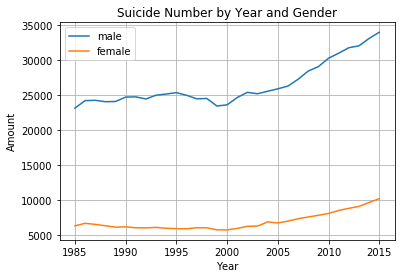

In [13]:
males = dt_tot_by_yr.loc[dt_tot_by_yr['sex']=="male", 'suicides_no']
females = dt_tot_by_yr.loc[dt_tot_by_yr['sex']=="female", 'suicides_no']
time_line = dt_tot_by_yr['year'].unique()

fig, ax = plt.subplots()
ax.plot(time_line, males, label="male")
ax.plot(time_line, females, label="female")
ax.legend()

# Incorporate the other graph properties
plt.title(f"Suicide Number by Year and Gender" )
plt.ylabel("Amount")
plt.xlabel("Year")
plt.grid(True)
plt.show()

In [14]:
df_by_gen=US_data.groupby(['year', 'generation'], as_index=False)
df_tot_by_gen=df_by_gen['suicides_no'].sum()
df_tot_by_gen.head()

,year,generation,suicides_no
0,1985,Boomers,6376
1,1985,G.I. Generation,9513
2,1985,Generation X,5399
3,1985,Silent,8158
4,1986,Boomers,6711


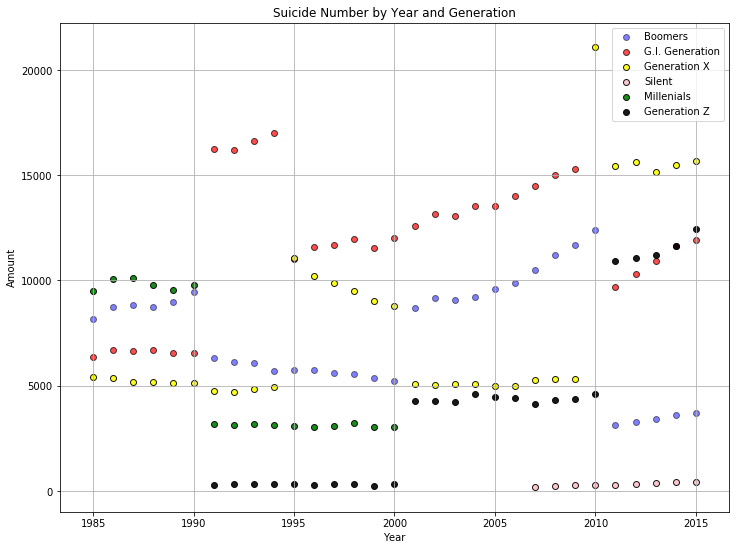

In [24]:
silent = df_tot_by_gen.loc[df_tot_by_gen['generation']=="Silent"]
boomers = df_tot_by_gen.loc[df_tot_by_gen['generation']=="Boomers"]
genx = df_tot_by_gen.loc[df_tot_by_gen['generation']=="Generation X"]
genz = df_tot_by_gen.loc[df_tot_by_gen['generation']=="Generation Z"]
gi_gen = df_tot_by_gen.loc[df_tot_by_gen['generation']=="G.I. Generation"]
millens = df_tot_by_gen.loc[df_tot_by_gen['generation']=="Millenials"]
time_line = df_tot_by_gen['year'].unique()

types=df_tot_by_gen['generation'].unique()
#Build scatterplots
plt.scatter(silent["year"], silent["suicides_no"], alpha=.5, color='blue', edgecolors='black', marker='o', label='Silent')
plt.scatter(boomers["year"], boomers["suicides_no"], alpha=.7, color='red', edgecolors='black', marker='o', label='Boomers')
plt.scatter(genx["year"], genx["suicides_no"], alpha=.9, color='yellow', edgecolors='black', marker='o', label='Generation X')
plt.scatter(genz["year"], genz["suicides_no"], alpha=.9, color='pink', edgecolors='black', marker='o', label='Generation Z')
plt.scatter(gi_gen["year"], gi_gen["suicides_no"], alpha=.9, color='green', edgecolors='black', marker='o', label='G.I. Generation')
plt.scatter(millens["year"], millens["suicides_no"], alpha=.9, color='black', edgecolors='black', marker='o', label='Millenials')

lgnd=plt.legend(types, loc="best")
# Incorporate the other graph properties
plt.title(f"Suicide Number by Year and Generation" )
plt.ylabel("Amount")
plt.xlabel("Year")

plt.grid(True)

# Get current size
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 7
plt.rcParams["figure.figsize"] = fig_size
plt.show()

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
# Save config information.
url = "ephtracking.cdc.gov/apigateway/api/v1/contentareas/json"
units = "imperial"
# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&id="

#empty dataframe to hold data
weather_df = pd.DataFrame(columns=['City','Country','Temp(F)',
                                   'Max Temp(F)', 'Humidity',
                                   'Cloudiness','Wind Speed',
                                   'Latitude', 'Longitude', 'Date'])


# loop through cities, make API request, and append desired results
for city_id in city_ids:
    
    response = requests.get(query_url + str(city_id)).json()
    try:
        print(f"Retrieving Results for {city_id}: {response['name']}.")
    except (KeyError):
        print("Missing field/result... skipping.")
          
    try:
        weather_df.loc[city_id, 'City'] = response['name']
        weather_df.loc[city_id, 'Country'] = response['sys']['country']
        weather_df.loc[city_id, 'Temp(F)'] = response['main']['temp']
        weather_df.loc[city_id, 'Max Temp(F)'] = response['main']['temp_max']
        weather_df.loc[city_id, 'Humidity'] = response['main']['humidity']
        weather_df.loc[city_id, 'Cloudiness'] = response['clouds']['all']
        weather_df.loc[city_id, 'Wind Speed'] = response['wind']['speed']
        weather_df.loc[city_id, 'Latitude'] = response['coord']['lat']
        weather_df.loc[city_id, 'Longitude'] = response['coord']['lon']
        weather_df.loc[city_id, 'Date'] = response['dt']
          
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")




Retrieving Results for 4292686: Georgetown.
Retrieving Results for 3460355: Jaciara.
Retrieving Results for 2074865: Carnarvon.
Retrieving Results for 5905393: Bonavista.
Retrieving Results for 471172: Voznesenskoye.
Retrieving Results for 2720679: Bollnas.
Retrieving Results for 964420: Port Elizabeth.
Retrieving Results for 3433715: Goya.
Retrieving Results for 2155415: New Norfolk.
Retrieving Results for 523392: Naryan-Mar.
Retrieving Results for 3924668: Abapo.
Retrieving Results for 2119283: Zyryanka.
Retrieving Results for 3833367: Ushuaia.
Retrieving Results for 6185377: Yellowknife.
Retrieving Results for 2120591: Tilichiki.
Retrieving Results for 3831208: Qaanaaq.
Retrieving Results for 1633419: Padang.
Retrieving Results for 2112309: Katsuura.
Retrieving Results for 4014338: Chihuahua.
Retrieving Results for 4034496: Fare.
Retrieving Results for 2022572: Khatanga.
Retrieving Results for 964432: Port Alfred.
Retrieving Results for 4030556: Rikitea.
Retrieving Results for 21261

Retrieving Results for 3397763: Jacareacanga.
Retrieving Results for 2377457: Nouadhibou.
Retrieving Results for 2022773: Khandyga.
Retrieving Results for 2191562: Dunedin.
Retrieving Results for 1814093: Dali.
Retrieving Results for 2036106: Liaozhong.
Retrieving Results for 2112802: Hasaki.
Retrieving Results for 1805833: Jiexiu.
Retrieving Results for 2814131: Waren.
Retrieving Results for 1259385: Port Blair.
Retrieving Results for 780687: Berlevag.
Retrieving Results for 3694112: Paita.
Retrieving Results for 4025994: Coahuayana.
Retrieving Results for 7839601: Mandurah.
Retrieving Results for 3461550: Ibitinga.
Retrieving Results for 4500546: Atlantic City.
Retrieving Results for 3622881: Mercedes.
Retrieving Results for 1738050: Miri.
Retrieving Results for 522353: Neya.
Retrieving Results for 1490256: Talnakh.
Retrieving Results for 2136825: Isangel.
Retrieving Results for 2028164: Deputatskiy.
Retrieving Results for 1490796: Strezhevoy.
Retrieving Results for 624785: Navahruda

ConnectionError: ('Connection aborted.', ConnectionResetError(54, 'Connection reset by peer'))

### Post API call check of data
* Export the city data into a .csv.
* Display the DataFrame info

In [9]:
weather_df.to_csv(output_data_file, encoding='utf-8', index=False)
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 535 entries, 1640344 to 3111475
Data columns (total 10 columns):
City           535 non-null object
Country        535 non-null object
Temp(F)        535 non-null object
Max Temp(F)    535 non-null object
Humidity       535 non-null object
Cloudiness     535 non-null object
Wind Speed     535 non-null object
Latitude       535 non-null object
Longitude      535 non-null object
Date           535 non-null object
dtypes: object(10)
memory usage: 66.0+ KB


In [10]:
#get the date from the first row for graphs display
dt = weather_df.head(1)["Date"].astype(str)
dt_str = datetime.datetime.fromtimestamp(int(dt)).strftime('%m/%d/%Y')

In [11]:
weather_df.head()


,City,Country,Temp(F),Max Temp(F),Humidity,Cloudiness,Wind Speed,Latitude,Longitude,Date
1640344,Kendari,ID,71.43,71.43,94,0,2.37,-3.94,122.5,1553033048
3874787,Punta Arenas,CL,51.33,51.8,66,75,19.46,-53.15,-70.92,1553033001
7839477,Busselton,AU,63.66,64.99,94,12,1.01,-33.68,115.37,1553032964
3351663,Benguela,AO,80.52,80.52,100,8,6.73,-12.58,13.41,1553033048
1162105,Zhob,PK,34.98,34.98,90,64,2.37,31.34,69.45,1553033048


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

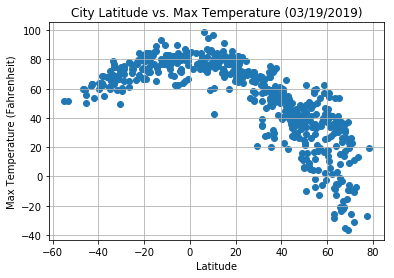

In [12]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Latitude"], weather_df["Max Temp(F)"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature ({dt_str})" )
plt.ylabel("Max Temperature (Fahrenheit)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/CityLatitudeVsMaxTemp.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

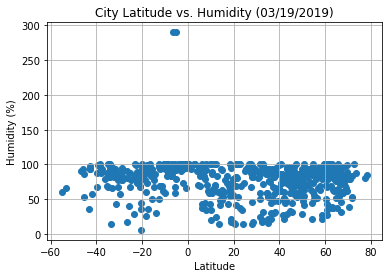

In [13]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Latitude"], weather_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({dt_str})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/CityLatitudeVsHumidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

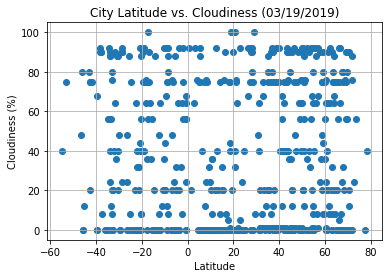

In [14]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({dt_str})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/CityLatitudeVsCloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

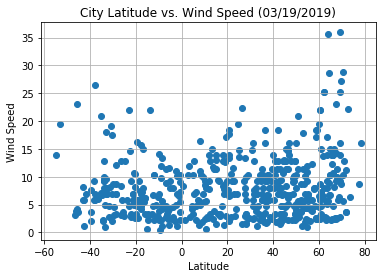

In [15]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({dt_str})")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/CityLatitudeVsWindSpeed.png")

# Show plot
plt.show()

### Find outlier for Humidity data and re-run graph without those values

In [16]:
weather_df.loc[weather_df['Humidity'] >= 290,:]

,City,Country,Temp(F),Max Temp(F),Humidity,Cloudiness,Wind Speed,Latitude,Longitude,Date
3698414,Chazuta,PE,62.6,62.6,290,75,3.36,-6.57,-76.14,1553032800
3694112,Paita,PE,62.6,62.6,290,0,9.17,-5.09,-81.11,1553032800


In [21]:
new_weather_df = weather_df[weather_df['Humidity'] < 290]

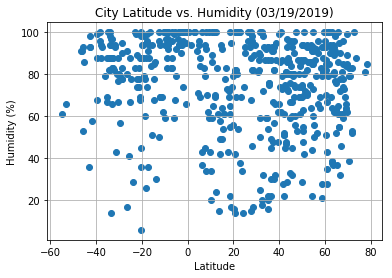

In [22]:
# Build a scatter plot for each data type
plt.scatter(new_weather_df["Latitude"], new_weather_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({dt_str})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/CityLatitudeVsHumidityNew.png")

# Show plot
plt.show()